<h1>Importing Liberaries and uploading the dataset</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import chardet
import scipy as sp

In [3]:
with open("./data/zomato.csv", 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(result)

{'encoding': 'MacRoman', 'confidence': 0.6358511488511488, 'language': ''}


In [4]:
df = pd.read_csv("./data/zomato.csv", encoding=result['encoding'])

<h1>Task 1: Data Exploration</h1>

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df.shape

(9551, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

<h2>Data Preprocessing on Features</h2>

<h3>Categorical Cols</h3>

In [16]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [17]:
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Restaurant Name: 7446 unique values
City: 141 unique values
Address: 8918 unique values
Locality: 1208 unique values
Locality Verbose: 1265 unique values
Cuisines: 1825 unique values
Currency: 12 unique values
Has Table booking: 2 unique values
Has Online delivery: 2 unique values
Is delivering now: 2 unique values
Switch to order menu: 1 unique values
Rating color: 6 unique values
Rating text: 6 unique values


In [18]:
for col in categorical_cols:
    print(df[col].value_counts(normalize=True).head(10))

Restaurant Name
Cafe Coffee Day     0.008690
Domino's Pizza      0.008271
Subway              0.006596
Green Chick Chop    0.005340
McDonald's          0.005026
Keventers           0.003560
Pizza Hut           0.003141
Giani               0.003036
Baskin Robbins      0.002932
Barbeque Nation     0.002722
Name: proportion, dtype: float64
City
New Delhi       0.573029
Gurgaon         0.117056
Noida           0.113077
Faridabad       0.026280
Ghaziabad       0.002618
Bhubaneshwar    0.002199
Lucknow         0.002199
Ahmedabad       0.002199
Amritsar        0.002199
Guwahati        0.002199
Name: proportion, dtype: float64
Address
Sector 41, Noida                                                              0.001152
Dilli Haat, INA, New Delhi                                                    0.001152
Greater Kailash (GK) 1, New Delhi                                             0.001047
The Imperial, Janpath, New Delhi                                              0.000942
Food Court, 3rd F

In [22]:
df['Primary Cuisine'] = df['Cuisines'].str.split(',').str[0].str.strip().str.lower()
top_cuisines = df['Primary Cuisine'].value_counts().nlargest(10).index
df['Cuisine Grouped'] = df['Primary Cuisine'].apply(lambda x: x if x in top_cuisines else 'Other')

In [23]:
text_cols = ['City', 'Locality', 'Locality Verbose', 'Rating text']
for col in text_cols:
    df[col] = df[col].str.strip().str.lower()

In [24]:
cat_cols = ['City', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating text', 'Cuisine Grouped']
df[cat_cols] = df[cat_cols].astype('category')


In [25]:
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=[0, 2, 3, 4, 5], labels=['Poor', 'Average', 'Good', 'Excellent'])

<h2>Numerical COls</h2>

In [20]:
df[numerical_cols].describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [31]:
df[numerical_cols].skew()

Restaurant ID           0.061570
Country Code            3.043965
Longitude              -2.807328
Latitude               -3.081635
Average Cost for two    2.568842
Price range             0.889618
Aggregate rating       -0.954130
Votes                   3.781207
dtype: float64

In [26]:
from scipy.stats.mstats import winsorize

df['Capped_Cost'] = winsorize(df['Average Cost for two'], limits=[0.01, 0.01])
df['Capped_Votes'] = winsorize(df['Votes'], limits=[0.01, 0.01])

In [27]:
df['Capped_Cost'] = pd.Series(df['Capped_Cost'])
df['Capped_Votes'] = pd.Series(df['Capped_Votes'])

In [28]:
df['Rating_Level'] = pd.cut(df['Aggregate rating'],
                            bins=[0, 2, 3, 4, 5],
                            labels=['Poor', 'Average', 'Good', 'Excellent'])

In [29]:
price_map = {1: 'Low', 2: 'Mid', 3: 'High', 4: 'Luxury'}
df['Price_Level'] = df['Price range'].map(price_map)

In [30]:
df.drop(columns=['Switch to order menu'], inplace=True) #NO varience Featurre

Some additional grouping

In [36]:
# city grouping 
city_proportion = df['City'].value_counts(normalize=True)
threshold = 0.01  # i.e., 1%
common_cities = city_proportion[city_proportion > threshold].index
df['City_grouped'] = df['City'].apply(lambda x: x if x in common_cities else 'Other')

In [37]:
# Group all non-INR currencies as "Other"
df['Currency_grouped'] = df['Currency'].apply(
    lambda x: x if x == 'Indian Rupees(Rs.)' else 'Other'
)

In [38]:
# Get top 10 most frequent cuisines
top_cuisines = df['Cuisines'].value_counts().nlargest(10).index

# Group all others into "Other"
df['Cuisines_grouped'] = df['Cuisines'].apply(
    lambda x: x if x in top_cuisines else 'Other'
)

<H3>Task 2: DISCRIPTIVE ANALYSIS </H3>

In [42]:
df[numerical_cols].median()

Restaurant ID           6.004089e+06
Country Code            1.000000e+00
Longitude               7.719196e+01
Latitude                2.857047e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64

In [43]:
df[numerical_cols].mode().iloc[0]

Restaurant ID            53.0
Country Code              1.0
Longitude                 0.0
Latitude                  0.0
Average Cost for two    500.0
Price range               1.0
Aggregate rating          0.0
Votes                     0.0
Name: 0, dtype: float64

In [44]:
df['Country Code'].value_counts(normalize=True)

Country Code
1      0.905874
216    0.045440
215    0.008376
30     0.006282
189    0.006282
214    0.006282
148    0.004188
208    0.003560
14     0.002513
162    0.002303
94     0.002199
166    0.002094
184    0.002094
191    0.002094
37     0.000419
Name: proportion, dtype: float64

In [45]:
df['Cuisines'].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [48]:
df['Country Code'].value_counts().head(10)

Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

In [46]:
df['City'].value_counts().head(10)

City
new delhi       5473
gurgaon         1118
noida           1080
faridabad        251
ghaziabad         25
bhubaneshwar      21
lucknow           21
guwahati          21
ahmedabad         21
amritsar          21
Name: count, dtype: int64

df['Cuisines'].value_counts().head(10)


 <h3>Descriptive Analysis Summary:</h3>

    Numerical Features:

        High skew in Votes and Average Cost for Two (outliers present)

        Aggregate Rating has reasonable spread, negatively skewed

    Categorical Features:

        Most restaurants are located in New Delhi

        Indian Rupees(Rs.) is the dominant currency

        Top cuisines include: North Indian, Chinese, Fast Food, Cafe

    Imbalance Observed:

        Many rare currencies and cities

        Cuisine combinations are highly diverse (1825 unique)


<h3>Task 3: Geospatial Analysis</h3>

In [76]:
import folium

# Create a map centered around the mean location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add restaurant markers
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='green' if row['Aggregate rating'] >= 4 else 'orange' if row['Aggregate rating'] >= 3 else 'red',
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['Restaurant Name']} ({row['Aggregate rating']})"
    ).add_to(restaurant_map)

# Save or display the map
restaurant_map.save('zomato_restaurants_map.html')

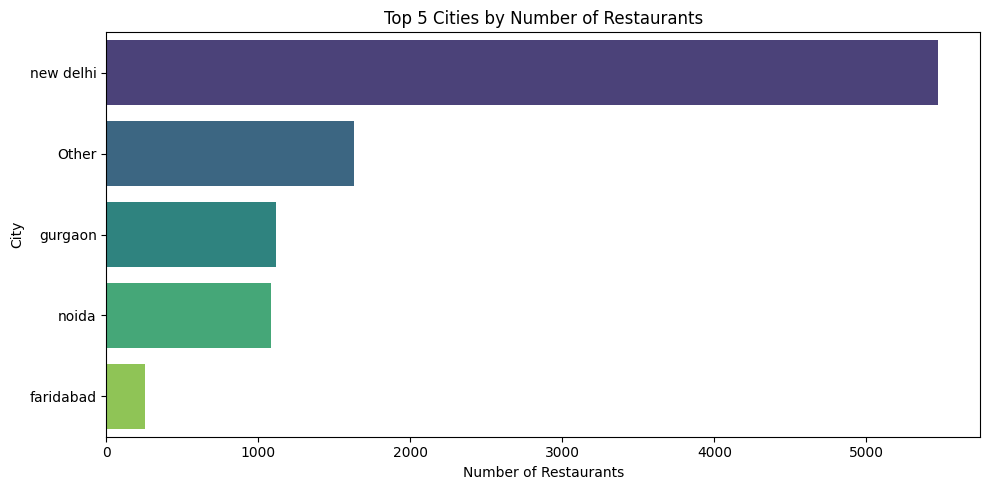

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top cities
top_cities = df['City_grouped'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title("Top 5 Cities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.tight_layout()
plt.show()

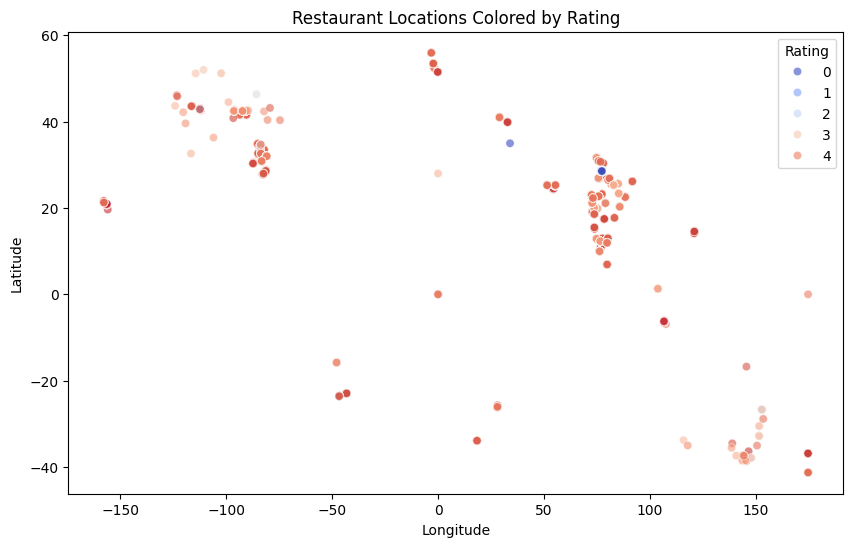

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='coolwarm', alpha=0.6)
plt.title('Restaurant Locations Colored by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Rating')
plt.show()

🌍 Task 3: Geospatial Analysis (Summary)
✅ Objective:

    Visualize restaurant locations using latitude & longitude.

    Analyze restaurant distribution across cities/countries.

    Check for correlation between location and rating.

📌 Key Insights:

    High density of restaurants in New Delhi (57%), followed by Gurgaon (11.7%) and Noida (11.3%).

    Data is heavily skewed toward Indian cities — especially NCR.

    Scatter plots and maps show restaurant clusters centered in NCR.

    No strong correlation between latitude/longitude and aggregate rating.

    Ratings are fairly evenly distributed across cities, regardless of location.

🧠 Conclusion:

    Location features (like City) may require balancing or grouping.

    Geographic data is useful for clustering or recommendation systems, but not directly predictive of ratings.

<h2>Level 3-> Task 3: Data Visualization</h2>

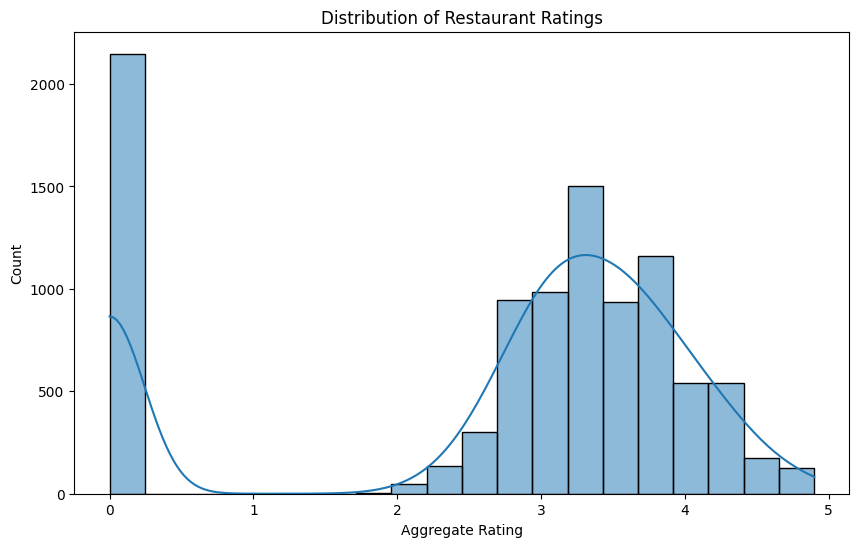

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of aggregate ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

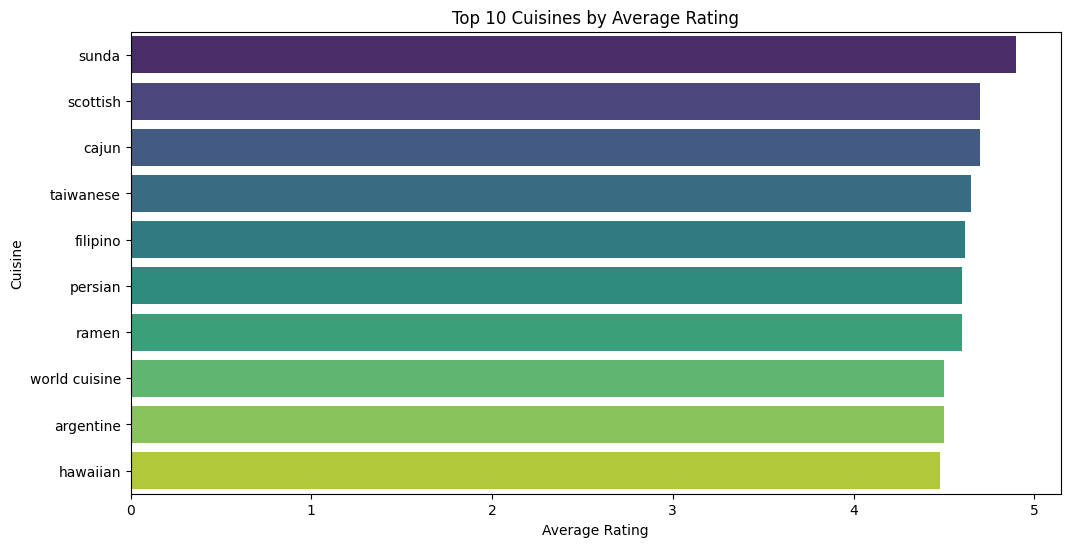

In [65]:
# Group by 'Primary Cuisine' and calculate mean rating
cuisine_rating = df.groupby('Primary Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=cuisine_rating.values, y=cuisine_rating.index, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

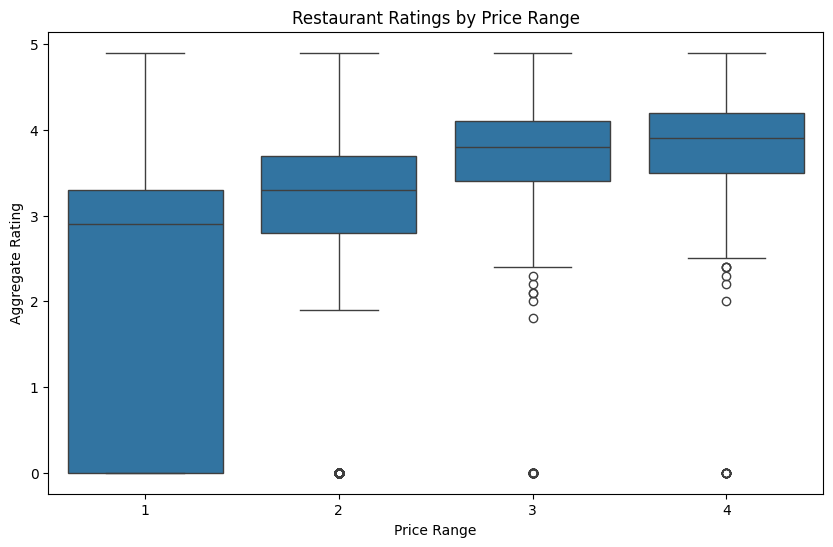

In [67]:
# Boxplot of ratings across different price ranges
plt.figure(figsize=(10,6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Restaurant Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

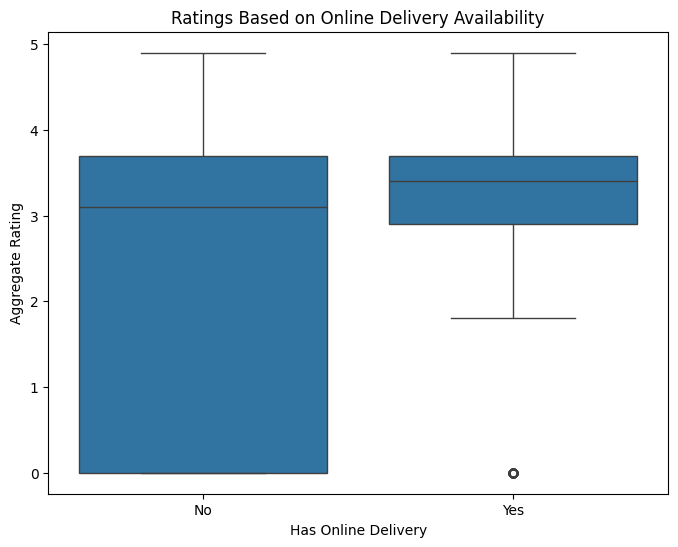

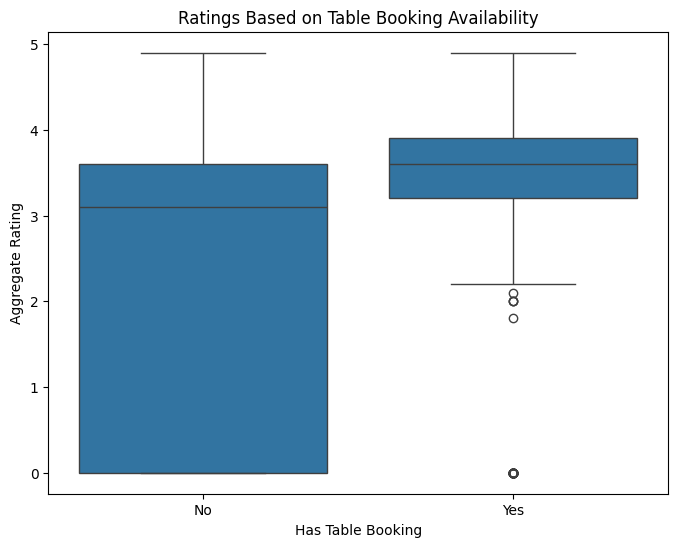

In [72]:
# Ratings for restaurants with and without online delivery
plt.figure(figsize=(8,6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df)
plt.title('Ratings Based on Online Delivery Availability')
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.show()

# Ratings for restaurants with and without table booking
plt.figure(figsize=(8,6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df)
plt.title('Ratings Based on Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')
plt.show()

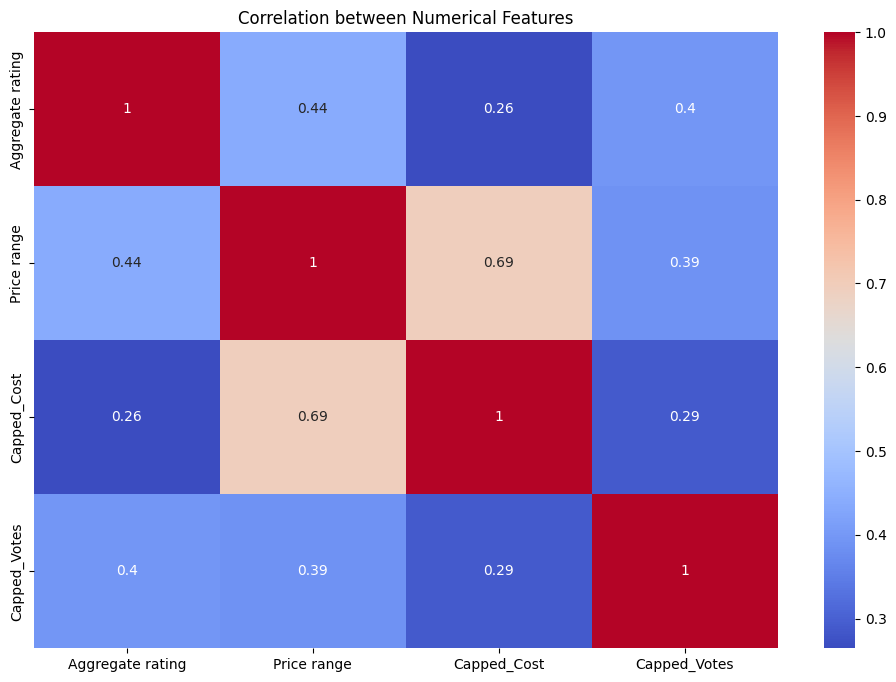

In [74]:
plt.figure(figsize=(12,8))
corr = df[['Aggregate rating', 'Price range', 'Capped_Cost', 'Capped_Votes']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Features')
plt.show()

<h2>Level 3-> Task 2: Customer Preference Analysis</h2>

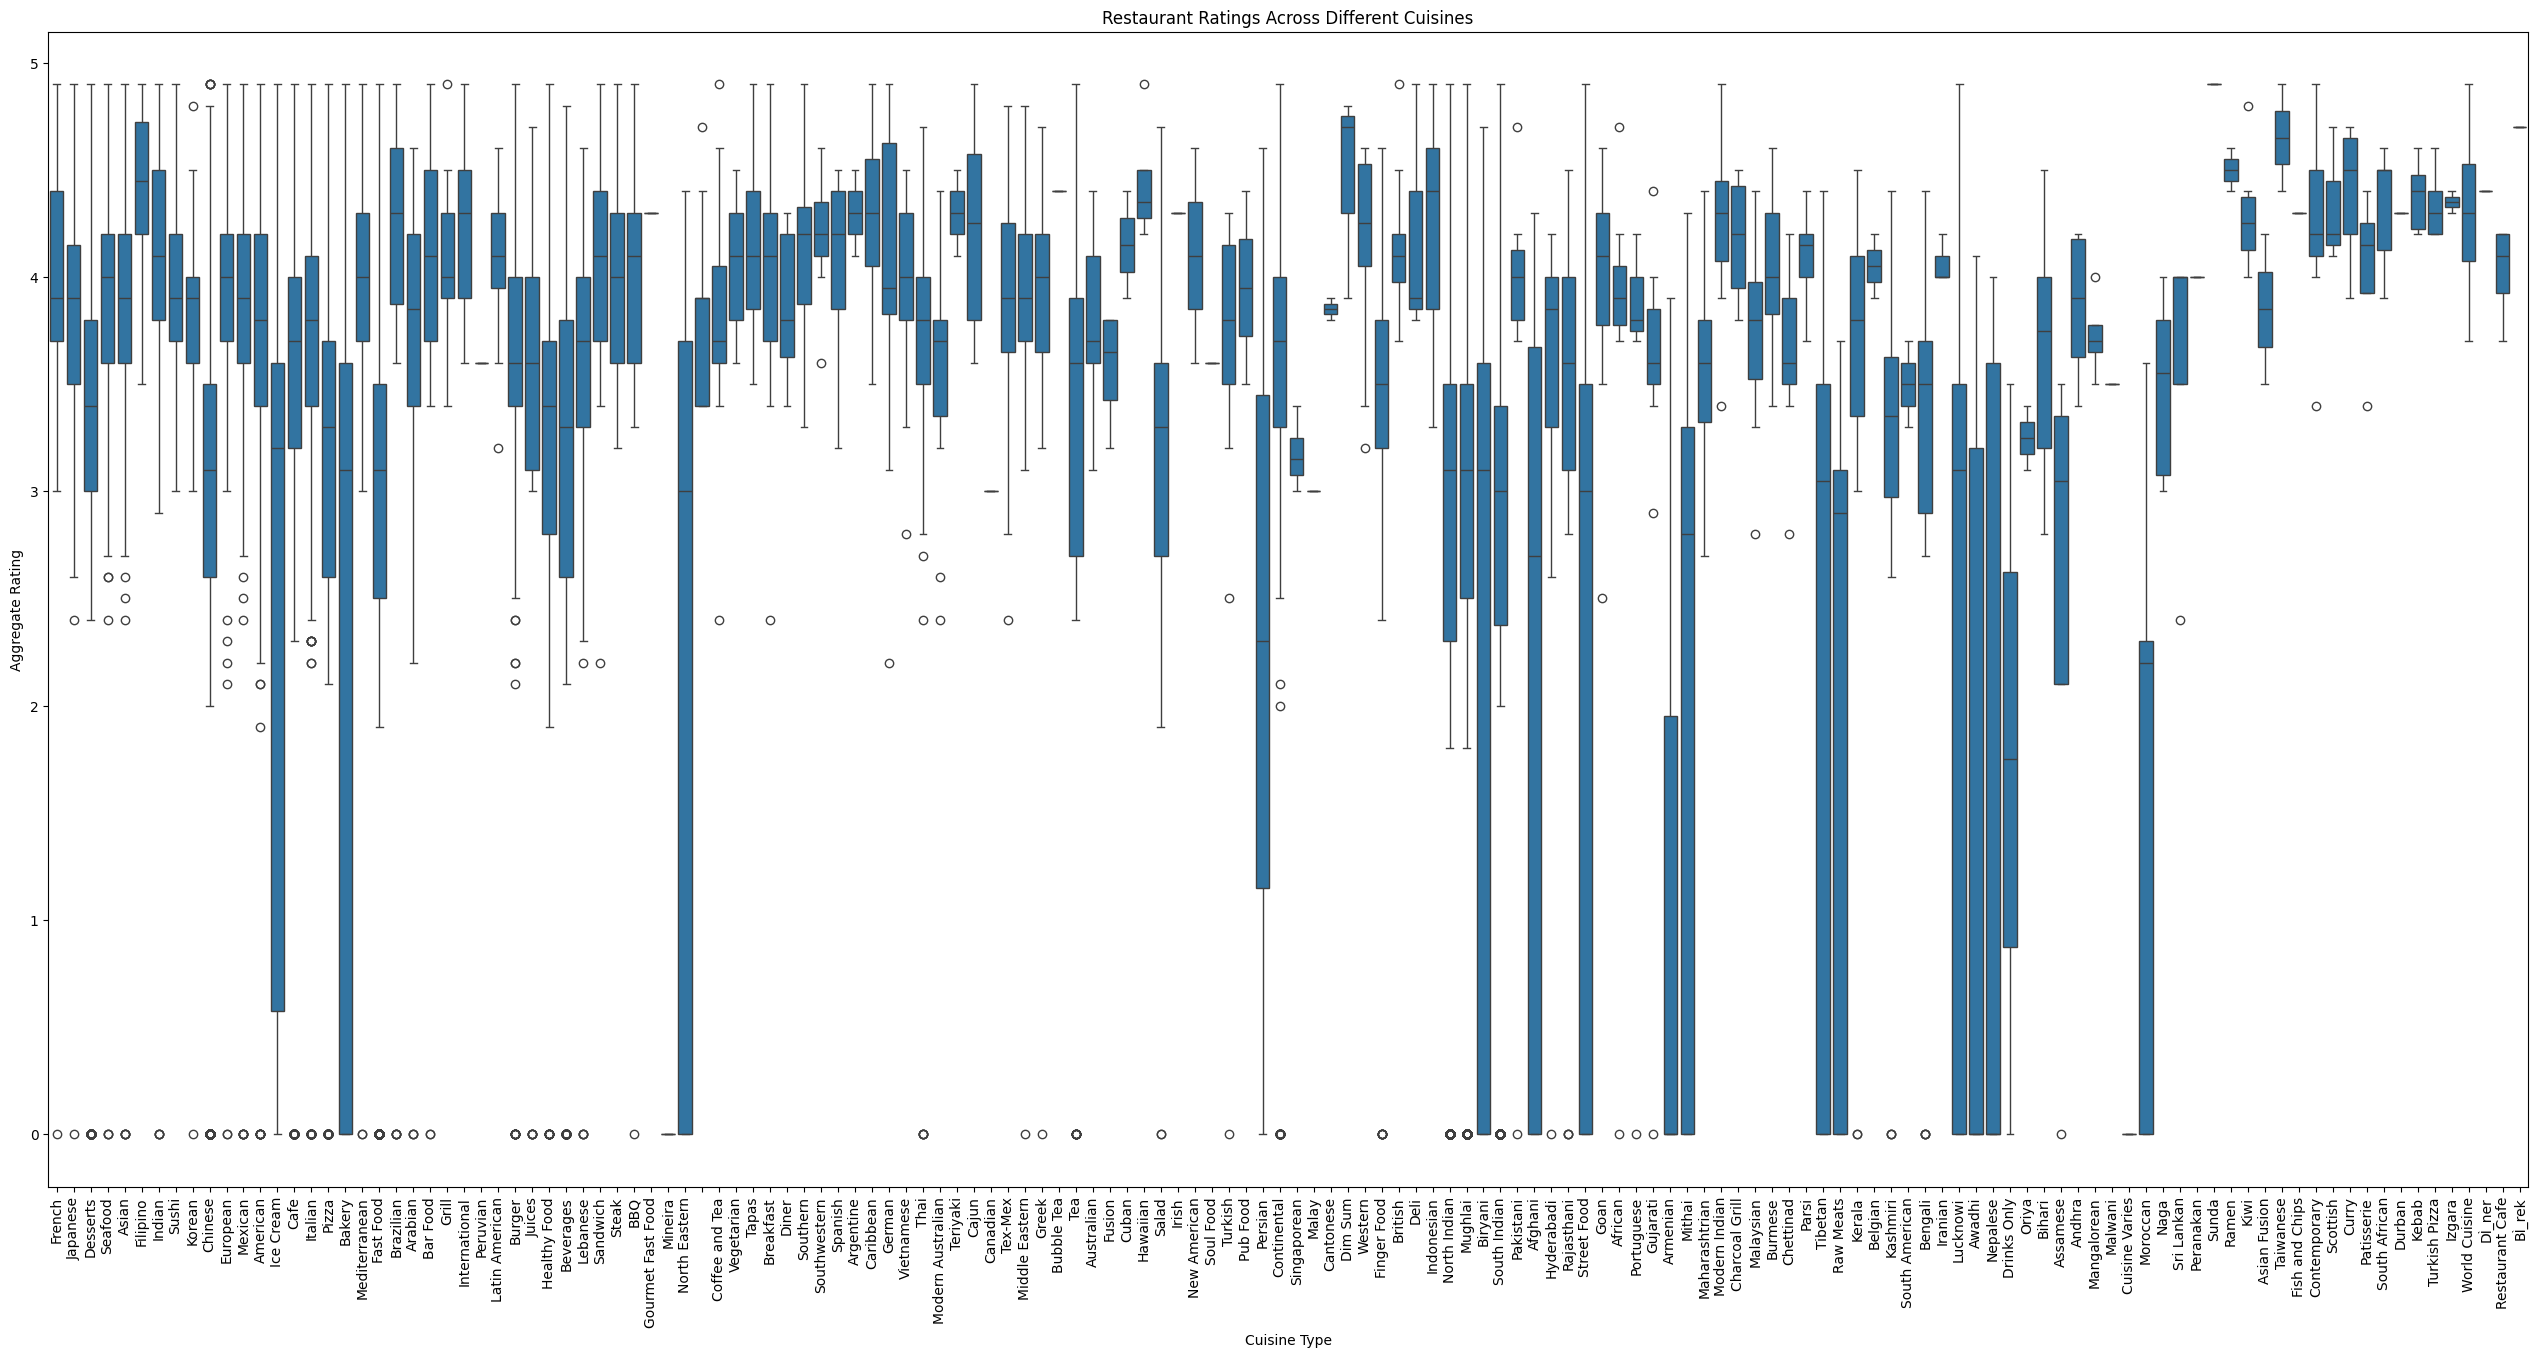

In [86]:
df_exploded = df.copy()
df_exploded['Cuisines'] = df_exploded['Cuisines'].fillna('')
df_exploded = df_exploded.assign(Cuisines=df_exploded['Cuisines'].str.split(','))
df_exploded = df_exploded.explode('Cuisines')

df_exploded['Cuisines'] = df_exploded['Cuisines'].str.strip()

# Now, analyzing ratings for each cuisine
plt.figure(figsize=(32,15))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_exploded)
plt.title('Restaurant Ratings Across Different Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Aggregate Rating')
plt.xlabel('Cuisine Type')
plt.show()

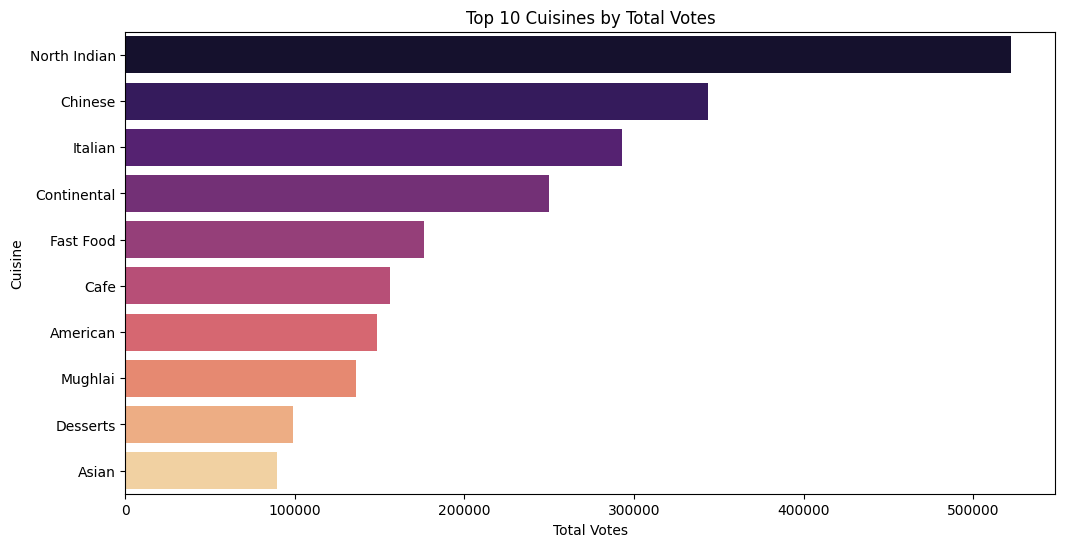

In [88]:
# Count votes per cuisine
votes_per_cuisine = df_exploded.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=votes_per_cuisine.values, y=votes_per_cuisine.index, palette='magma')
plt.title('Top 10 Cuisines by Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.show()

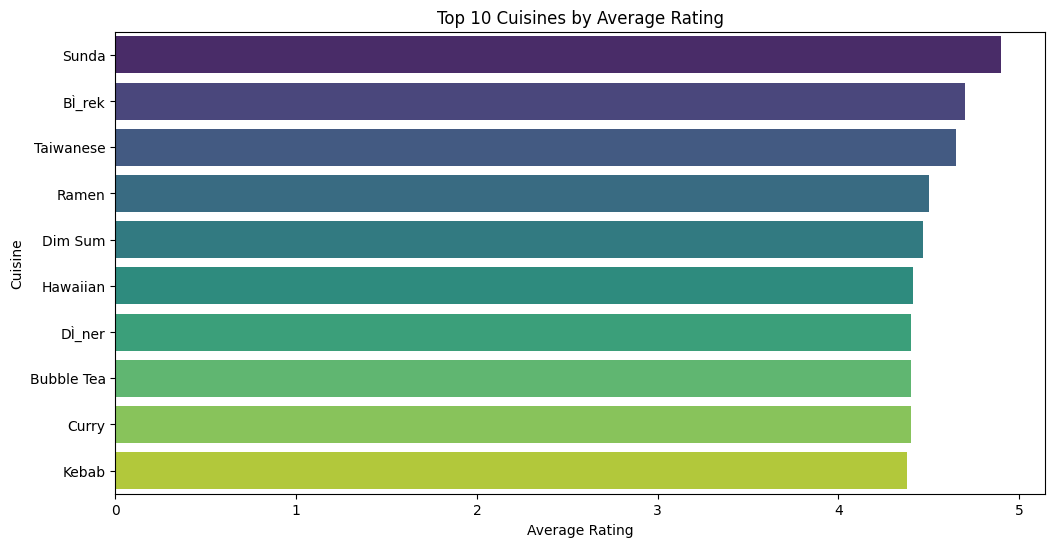

In [89]:
# Calculating mean rating per cuisine
avg_rating_cuisine = df_exploded.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_cuisine.values, y=avg_rating_cuisine.index, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

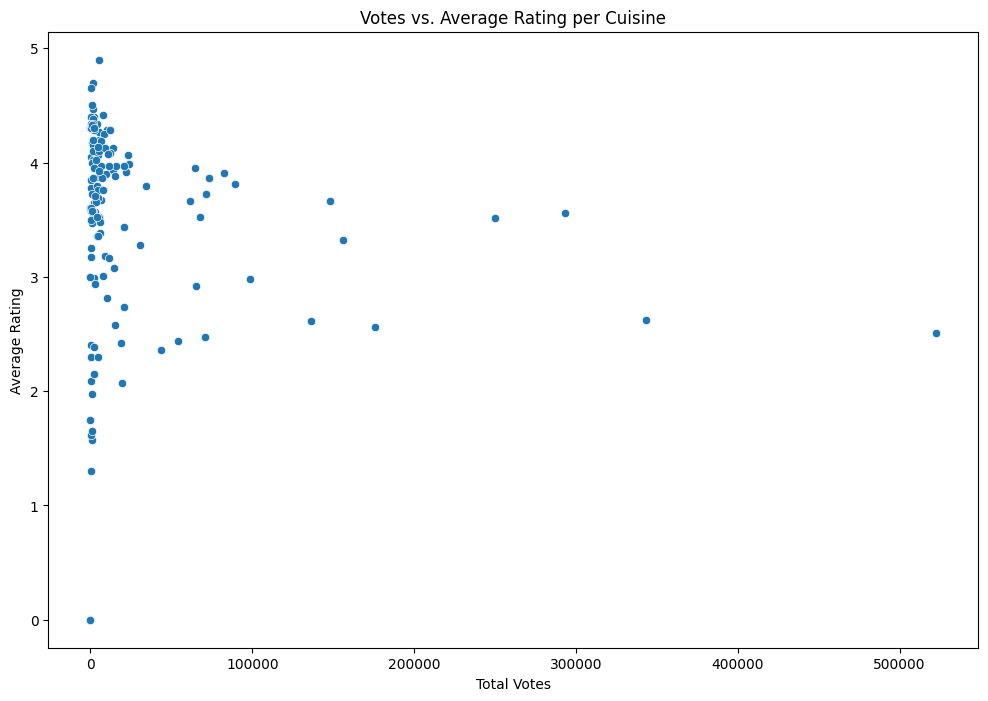

<Axes: xlabel='Votes', ylabel='Aggregate rating'>

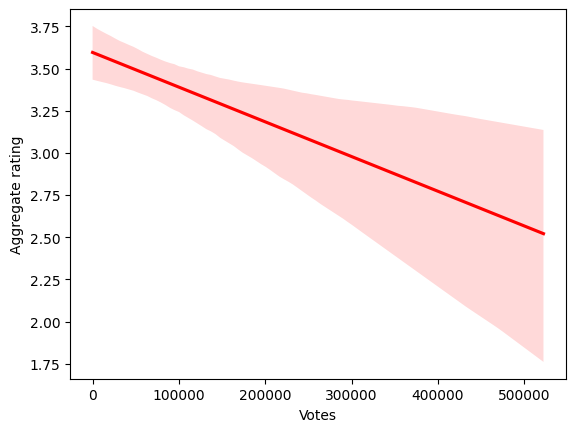

In [103]:
df['Cuisines'] = df['Cuisines'].fillna('')
df_cuisines = df.assign(Cuisines=df['Cuisines'].str.split(',')).explode('Cuisines')
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].str.strip()

# Aggregate data: mean rating and total votes per cuisine
cuisine_stats = df_cuisines.groupby('Cuisines').agg({'Votes':'sum', 'Aggregate rating':'mean'}).reset_index()

# Plot to visualize correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='Votes', y='Aggregate rating', data=cuisine_stats)
plt.title('Votes vs. Average Rating per Cuisine')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.show()

sns.regplot(x='Votes', y='Aggregate rating', data=cuisine_stats, scatter=False, color='red')

<h3>Customer Preference Analysis Report:</h3> 
<h4>

Top Cuisines Based on Customer Votes:

    North Indian cuisine leads significantly with over 500,000 votes, indicating its widespread popularity among customers.
    Following are other popular cuisines:
        Chinese: approximately 35,000 votes
        Italian: approximately 30,000 votes
        Continental: approximately 25,000 votes
        Fast Food: approximately 20,000 votes
        

Top 10 Cuisines Based on Average Ratings:

    The analysis shows that all of the top 10 cuisines in terms of average customer ratings have received similar ratings, suggesting a consistent level of customer satisfaction across these cuisines regardless of their vote counts.

</h4>